In [ ]:
import cv2
import numpy as np
import os

In [ ]:
def load_images_from_folder(folder):
    images = []
    labels = []
    for category in os.listdir(folder):
        for filename in os.listdir(os.path.join(folder,category)):
            img = cv2.imread(os.path.join(folder,category,filename))
            if img is not None:
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # convert from BGR to RGB
                images.append(img)
                labels.append(category)
    return np.array(images), np.array(labels)


In [ ]:
train_folder = 'D:/10th Semester/CIFAR-10/train'
test_folder = 'D:/10th Semester/CIFAR-10/test'
train_images, train_labels = load_images_from_folder(train_folder)
test_images, test_labels = load_images_from_folder(test_folder)


In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [ ]:
print("Training images shape:", train_images.shape)
print("Training labels shape:", train_labels.shape)
print("Test images shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)

Training images shape: (50000, 32, 32, 3)
Training labels shape: (50000,)
Test images shape: (10000, 32, 32, 3)
Test labels shape: (10000,)


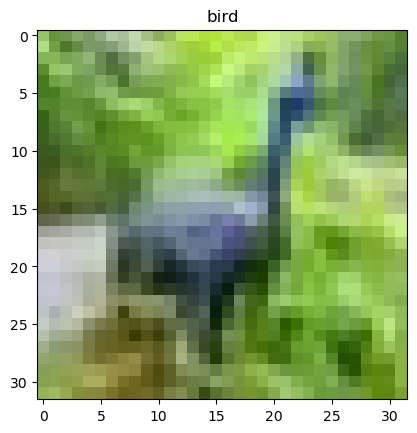

In [ ]:
import matplotlib.pyplot as plt

# select an image to view
image_index = 10000

# display the image
plt.imshow(train_images[image_index])
plt.title(train_labels[image_index])
plt.show()

In [ ]:
import numpy as np

# set the number of samples to use for subsampling
num_testing = 1000
num_training = 5000
# randomly select indices for subsampling
train_indices = np.random.choice(len(train_images), num_training , replace=False)
test_indices = np.random.choice(len(test_images), num_testing, replace=False)

# subsample the training and test data using the selected indices
train_images_sub = train_images[train_indices]
train_labels_sub = train_labels[train_indices]
test_images_sub = test_images[test_indices]
test_labels_sub = test_labels[test_indices]


In [ ]:
# get the dimensions of the images
image_dim = train_images.shape[1:]

# flatten the images into 1D arrays
train_images_flat = train_images_sub.reshape(train_images_sub.shape[0], -1)
test_images_flat = test_images_sub.reshape(test_images_sub.shape[0], -1)

# print the new shapes of the flattened arrays
print("Training images shape (flat):", train_images_flat.shape)
print("Test images shape (flat):", test_images_flat.shape)


Training images shape (flat): (5000, 3072)
Test images shape (flat): (1000, 3072)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# create a kNN classifier instance
knn = KNeighborsClassifier(n_neighbors=5)
# train the kNN classifier on the training data and labels
knn.fit(train_images_flat, train_labels_sub)
# make predictions on the test data using the kNN classifier
test_preds = knn.predict(test_images_flat)

# print the first 10 predicted labels
print("Predicted labels:", test_preds[:10])



Predicted labels: ['deer' 'bird' 'deer' 'horse' 'deer' 'ship' 'airplane' 'deer' 'deer'
 'airplane']


In [ ]:
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier

# define the number of folds for cross-validation
num_folds = 5

# define the different k values to try
k_choices = [1, 3, 5, 8, 10, 12, 15, 20, 50, 100]

# define the distance metrics to use
metrics = ['l1', 'l2']

# initialize dictionary to store accuracies for each k and distance metric
k_to_accuracies = {}
for metric in metrics:
    k_to_accuracies[metric] = {k: [] for k in k_choices}

# create a k-fold cross-validation generator
kf = KFold(n_splits=num_folds, shuffle=True)

# loop over each fold
for fold, (train_indices, test_indices) in enumerate(kf.split(train_images_flat)):
    print("Processing fold", fold+1)

    # extract the training and test data for this fold
    fold_train_images = train_images_flat[train_indices]
    fold_train_labels = train_labels_sub[train_indices]
    fold_test_images = train_images_flat[test_indices]
    fold_test_labels = train_labels_sub[test_indices]

    # loop over different k values
    for k in k_choices:
        # loop over different distance metrics
        for metric in metrics:
            # create a kNN classifier instance with the current k value and distance metric
            knn = KNeighborsClassifier(n_neighbors=k, metric=metric)

            # train the kNN classifier on the training data for this fold
            knn.fit(fold_train_images, fold_train_labels)

            # make predictions on the test data for this fold
            fold_test_preds = knn.predict(fold_test_images)

            # compute the accuracy of the predictions for this fold, current k value, and distance metric
            fold_accuracy = np.mean(fold_test_preds == fold_test_labels)

            # add the accuracy to the list of accuracies for the current k value and distance metric
            k_to_accuracies[metric][k].append(fold_accuracy)

# Print out the computed accuracies for each k and distance metric
for metric in metrics:
    for k in sorted(k_to_accuracies[metric]):
        print('metric = %s, k = %d, accuracy = %f' % (metric, k, np.mean(k_to_accuracies[metric][k])))


Processing fold 1
Processing fold 2
Processing fold 3
Processing fold 4
Processing fold 5
metric = l1, k = 1, accuracy = 0.290000
metric = l1, k = 3, accuracy = 0.279200
metric = l1, k = 5, accuracy = 0.290800
metric = l1, k = 8, accuracy = 0.302600
metric = l1, k = 10, accuracy = 0.298600
metric = l1, k = 12, accuracy = 0.301000
metric = l1, k = 15, accuracy = 0.296000
metric = l1, k = 20, accuracy = 0.292400
metric = l1, k = 50, accuracy = 0.276800
metric = l1, k = 100, accuracy = 0.267400
metric = l2, k = 1, accuracy = 0.265200
metric = l2, k = 3, accuracy = 0.252200
metric = l2, k = 5, accuracy = 0.266800
metric = l2, k = 8, accuracy = 0.272200
metric = l2, k = 10, accuracy = 0.271600
metric = l2, k = 12, accuracy = 0.269400
metric = l2, k = 15, accuracy = 0.268000
metric = l2, k = 20, accuracy = 0.266400
metric = l2, k = 50, accuracy = 0.260000
metric = l2, k = 100, accuracy = 0.241200


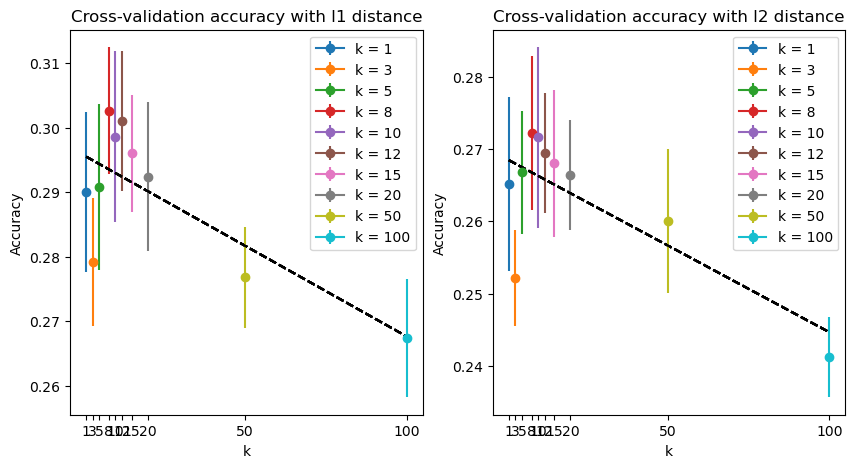

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# plot the results for L1 distance metric
for i, ax in enumerate(axs):
    for k in k_choices:
        accuracies = k_to_accuracies[metrics[i]][k]
        ax.errorbar(k, np.mean(accuracies), yerr=np.std(accuracies), fmt='o-', label='k = %d' % k)
        z = np.polyfit(k_choices, [np.mean(k_to_accuracies[metrics[i]][k]) for k in k_choices], 1)
        p = np.poly1d(z)
        ax.plot(k_choices, p(k_choices), "--", color='black')

    ax.set_title('Cross-validation accuracy with %s distance' % metrics[i])
    ax.set_xlabel('k')
    ax.set_ylabel('Accuracy')
    ax.set_xticks(k_choices)
    ax.legend()

plt.show()


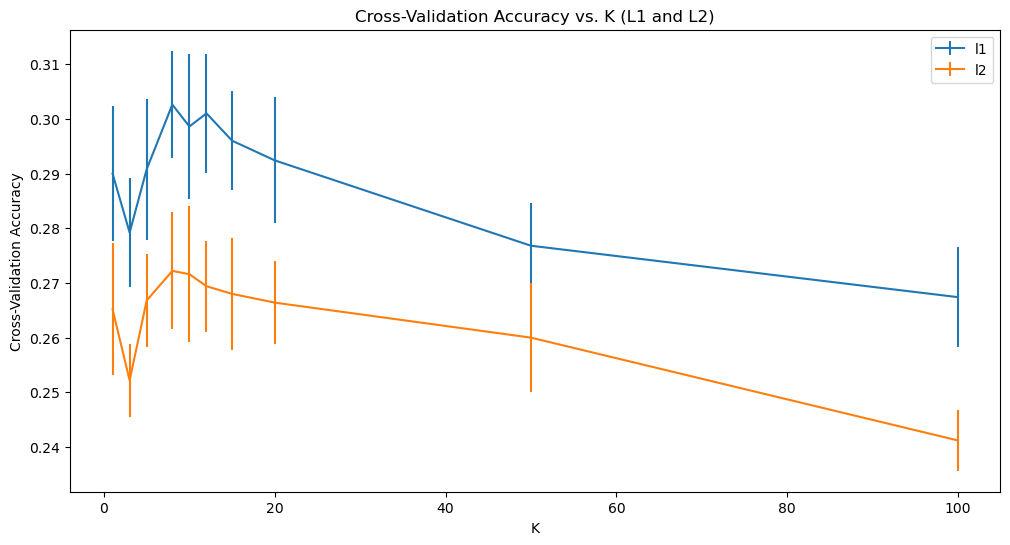

In [ ]:
import matplotlib.pyplot as plt

# Plot the cross-validation accuracies for each value of k and distance metric
plt.figure(figsize=(12,6))
for metric in metrics:
    accuracies_mean = [np.mean(k_to_accuracies[metric][k]) for k in k_choices]
    accuracies_std = [np.std(k_to_accuracies[metric][k]) for k in k_choices]
    plt.errorbar(k_choices, accuracies_mean, yerr=accuracies_std, label=metric)

plt.title('Cross-Validation Accuracy vs. K (L1 and L2)')
plt.xlabel('K')
plt.ylabel('Cross-Validation Accuracy')
plt.legend()
plt.show()
